#                               Sales Channel Prediction

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The company has to select proper sales channel to predict the right sales channel to generate good revenue.

# Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importing Dataset 

In [2]:
data=pd.read_csv('Advertising.csv')
data.head()

,SL_NO,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


Data has 4 features TV,radio,newspaper and sale. The number of observations are 200. First 3 featuers are the advertisements shown in each sector (tv, newspaper or radio) and 4th feature i.e sales is the number of sales after the advertisement. The goal is to find the find the realtionship between advertisement and sales, and to predict the sales for a particular number of advertisement in each sector.

In [3]:
#Dropping SL_NO column
data.drop(['SL_NO'],axis=1,inplace=True)

In [4]:
data

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [5]:
data.shape

(200, 4)

This dataset has 200 rows and 4 columns

In [6]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


From the above data we can see there is  some abnormility in the newspaper data values as we can see a large gap between 75 percentile and  max values.

This abnormility will be treated in the handling outliers section below

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


all the features including class are non-null float features

# Null/Missing  Value Analysis

Checking the null/missing value is the first and required step in the EDA analyis.
Finding Null/Missing value and handling them contributes in the better performance of the model.

In [8]:
data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

We cannot find any Null/Missing values in this data

# Pictorial Representation of the Null/Missing values Using Heatmap

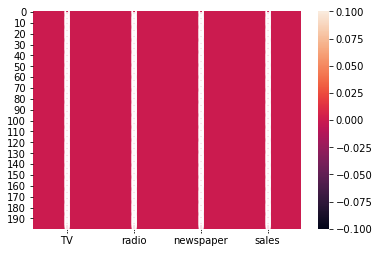

In [9]:
sns.heatmap(data.isnull(),annot=True)

# CorRelation Matrix

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.

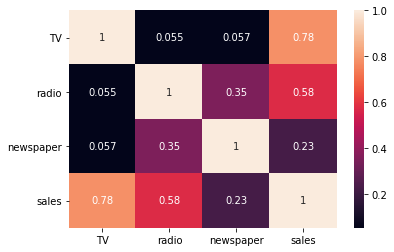

In [10]:
df_cor=data.corr()
sns.heatmap(df_cor,annot=True)

CorRelation co efficients between feature and class

TV-Sales --0.78

Radio -Sales-->0.58

Newspaper - Sales --> 0.23

Therefore it can be concluded from above that Tv sales relation are stronger than other features vs class

# UniVariate Analysis

1.Plotting distribution Plots for the data

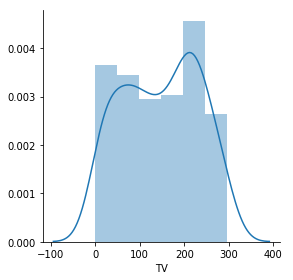

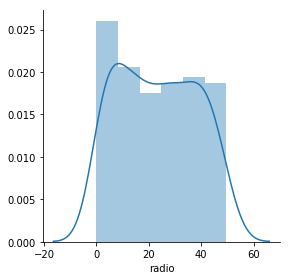

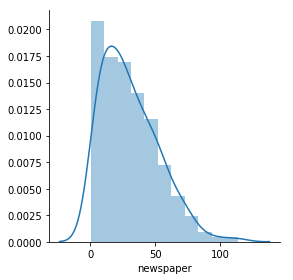

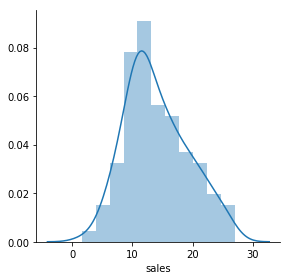

In [11]:
import warnings
warnings.filterwarnings("ignore")
columns=data.columns
for val in columns:
#Plotting Probablity Density Function Curve for the age : -
    sns.FacetGrid(data,size=4)\
    .map(sns.distplot,val)\
    .add_legend();
plt.show();

skewness can be observed in the dataset from the above plot.

In [12]:
data.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

Newspaper is skewed as skewness is above 0.55 , therefore it will treated using A Box Cox transformation which will help to normalise the data  

In [13]:
from scipy import stats
data['newspaper']=stats.boxcox(data['newspaper'])[0]


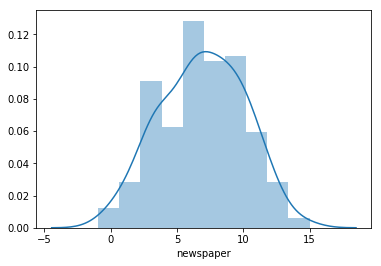

In [14]:
sns.distplot(data['newspaper'])

Now after applying the  Box Cox transformation , we can see that newspaper column is now normalised.

In [15]:
data.skew()

TV          -0.069853
radio        0.094175
newspaper   -0.089651
sales        0.407571
dtype: float64

2.Plotting BoxPlots for the data

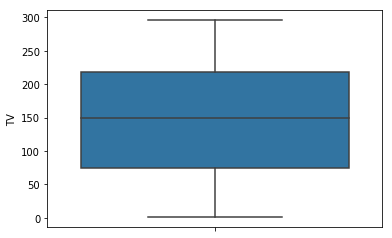

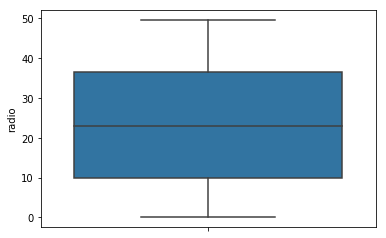

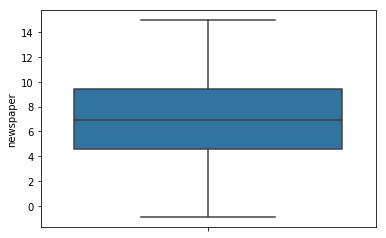

In [16]:
import warnings
warnings.filterwarnings("ignore")
columns=data.columns[:-1]
for val in columns:
    sns.boxplot(y=val,data=data)
    plt.show()

From the above plots it can be seen that there is no outlier now in the data set , but for little smooting of the dataset we  will be treating outliers using zscore to be more sure that the outliers have been removed.

# BiVariate Analysis

1.Plotting Line Plots 

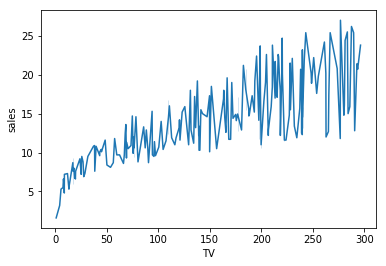

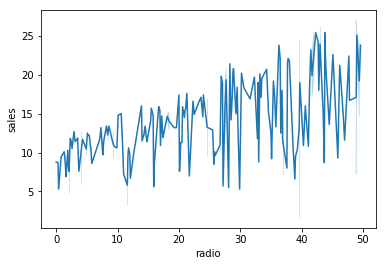

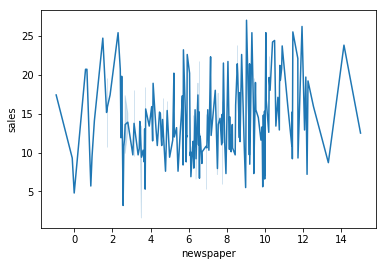

In [17]:
column=list(data.columns[:-1])
for val in column:
    sns.lineplot(x=val,y='sales', data=data)
    plt.show()

Tv and sales are showing more linearity and hence TV becomes an important contributor for the class.

2.Scatter Plot

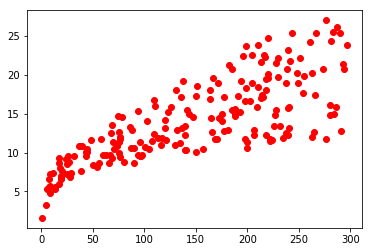

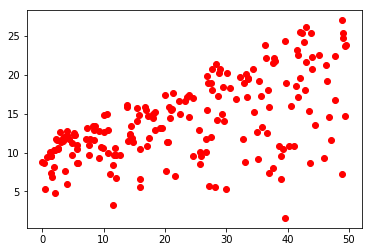

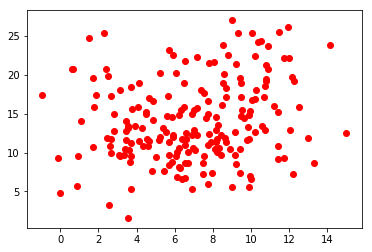

In [18]:
column=list(data.columns[:-1])
for val in column:
    plt.scatter(x=val,y='sales', data=data,color='red')
    plt.show()

3. Regression Plot

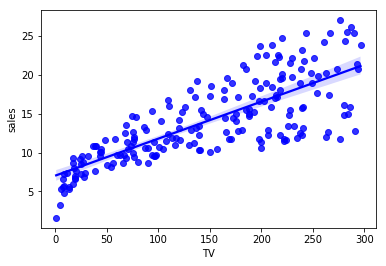

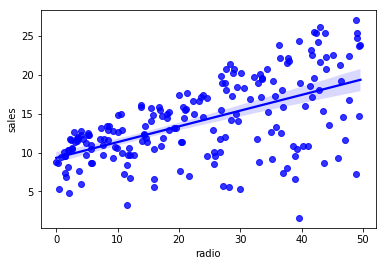

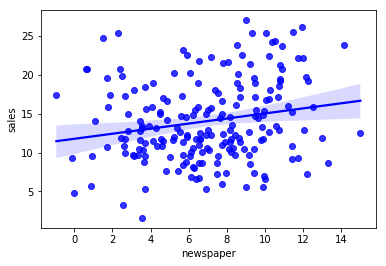

In [19]:
column=list(data.columns[:-1])
for val in column:
    sns.regplot(x=val,y='sales', data=data,color='blue')
    plt.show()

TV-sales shows higher slopes 

4.Pair Plots

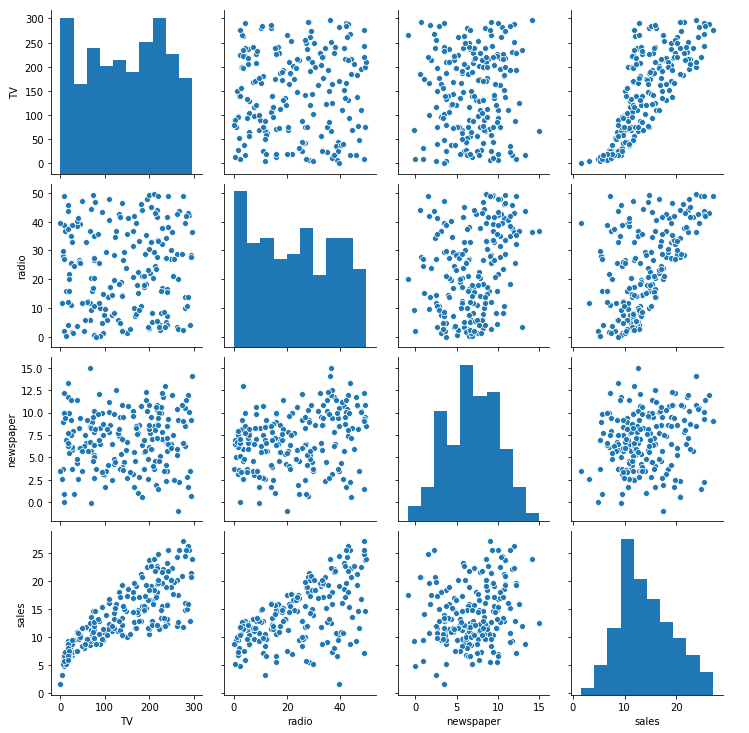

In [20]:
sns.pairplot(data)

# Handling Outliers

In [21]:
from scipy.stats import zscore
zs=np.abs(zscore(data))
zs

array([[9.69852266e-01, 9.81522472e-01, 1.51470665e+00, 1.55205313e+00],
       [1.19737623e+00, 1.08280781e+00, 7.82314137e-01, 6.96046111e-01],
       [1.51615499e+00, 1.52846331e+00, 1.51740638e+00, 9.07405869e-01],
       [5.20496822e-02, 1.21785493e+00, 1.21157338e+00, 8.60330287e-01],
       [3.94182198e-01, 8.41613655e-01, 1.20859449e+00, 2.15683025e-01],
       [1.61540845e+00, 1.73103399e+00, 1.66770613e+00, 1.31091086e+00],
       [1.04557682e+00, 6.43904671e-01, 1.08329192e-01, 4.27042783e-01],
       [3.13436589e-01, 2.47406325e-01, 8.34159417e-01, 1.58039455e-01],
       [1.61657614e+00, 1.42906863e+00, 2.18650734e+00, 1.77205942e+00],
       [6.16042873e-01, 1.39530685e+00, 2.28075318e-01, 6.57617064e-01],
       [9.45155670e-01, 1.17923146e+00, 7.32461166e-02, 1.04190753e+00],
       [7.90028350e-01, 4.96973404e-02, 1.59261443e+00, 6.48970529e-01],
       [1.43908760e+00, 7.99208859e-01, 1.42431300e+00, 9.26620392e-01],
       [5.78501712e-01, 1.05768905e+00, 1.21595178e

In [22]:
df=data[(zs<3).all(axis=1)]
df

,TV,radio,newspaper,sales
0,230.1,37.8,11.719889,22.1
1,44.5,39.3,9.400769,10.4
2,17.2,45.9,11.728438,9.3
3,151.5,41.3,10.760018,18.5
4,180.8,10.8,10.750585,12.9
...,...,...,...,...
195,38.2,3.7,4.786082,7.6
196,94.2,4.9,3.349723,9.7
197,177.0,9.3,2.810135,12.8
198,283.6,42.0,11.460018,25.5


In [23]:
print('shape of the data with outliers  ' ,data.shape)
print('shape of the data without  outliers  ' ,df.shape)

shape of the data with outliers   (200, 4)
shape of the data without  outliers   (200, 4)


In this section we have treated the outliers with the help of ZSCORE using threshold value as 3 , 
But as we have mentioned earlier that this data is now outliers free after applying box cox , here also 
the outliers is not found on in other words data has no values which has zscore > 3.

Hence the new shape of the dataset remains 200 * 4 as no rows/columns have been removed.

# Separating the input and output variables

In [24]:
x=df.iloc[:,:-1]
x

,TV,radio,newspaper
0,230.1,37.8,11.719889
1,44.5,39.3,9.400769
2,17.2,45.9,11.728438
3,151.5,41.3,10.760018
4,180.8,10.8,10.750585
...,...,...,...
195,38.2,3.7,4.786082
196,94.2,4.9,3.349723
197,177.0,9.3,2.810135
198,283.6,42.0,11.460018


In [25]:
y=df.iloc[:,-1]
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

The output variables has a real valued data which means that models that we use should be of regression as predicting real valued feature is done by regression.

# Applying Various Regression Models 

In this section we will be applying several regressor models and hence we will be checking following performance matrix :
    
    1) R2 score
    2) Root mean sqaure Error 
    3) Mean of crossing validation score using R2 as scoring
    4) Std Deviation of crossing validation score using R2 as scoring
  
 We have also used GridSearch for tuning the parameters

In [26]:
#importing the libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Function for R2 Score

This function is built to find the best r2 score depending on the random state while splitting the model.
This function prints the best r2 score and returns the random state for that R2 score

In [27]:
from  sklearn.metrics import r2_score
def max_r2_score(model,x,y):
    random_state=np.arange(42,101)
    max_r2_score=0
    for r_state in random_state:
        train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=r_state)
        model.fit(train_x,train_y)
        pred = model.predict(test_x)
        r2_scr=r2_score(test_y,pred)
        #print('The accuracy for the {} is {}'.format(r_state,accuracy_score(test_y,pred_DT)))
        if r2_scr > max_r2_score:
            max_r2_score=r2_scr
            Final_r_state=r_state
    print('The maximum r2 score  is {} at random state {}' .format(max_r2_score,Final_r_state))
    return Final_r_state

# Function for RMSE

This function finds the rmse of the model using the random state at best r2 score.

In [28]:
def rmse(model,x,y,Final_r_state):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=Final_r_state)
    model.fit(train_x,train_y)
    pred = model.predict(test_x)
    print('RMSE',np.sqrt(mean_squared_error(test_y,pred)))
    return np.sqrt(mean_squared_error(test_y,pred))

Below function is created to make a list of rmse generated by different regressor , so that it can be compared at last, for the selection of the best model

In [29]:
rmse_list=[]
def list_rmse(RMSE):
    rmse_list.append(RMSE)
    return rmse_list


# 1.Linear Regression

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
Final_r_state=max_r2_score(lreg,x,y)
from sklearn.model_selection import cross_val_score
print('mean cross_val_score',cross_val_score(lreg,x,y,cv=5,scoring='r2').mean())
print('std deviation of cross_val_score',cross_val_score(lreg,x,y,cv=5,scoring='r2').std())
RMSE=rmse(lreg,x,y,Final_r_state)
List_rmse=list_rmse(RMSE)

The maximum r2 score  is 0.9290454502299158 at random state 57
mean cross_val_score 0.8874145757281674
std deviation of cross_val_score 0.03978539881364426
RMSE 1.368307597701973


# 2.KNeighborsRegressor

In [31]:
# The range of K is taken from -30 to 30 and used grid serach cv for hyperparameter tuning
from sklearn.neighbors import KNeighborsRegressor
neighbors={'n_neighbors':range(-30,30)}
knr=KNeighborsRegressor()
gs=GridSearchCV(knr,neighbors,cv=10)
gs.fit(x,y)
gs.best_params_

{'n_neighbors': 2}

The best parameter for this model is 2 , so we will be training the our model on n_neighbors =2

In [32]:
knr=KNeighborsRegressor(n_neighbors=2)
Final_r_state=max_r2_score(knr,x,y)
print('mean cross_val_score',cross_val_score(knr,x,y,cv=5,scoring='r2').mean())
print('std deviation of cross_val_score',cross_val_score(knr,x,y,cv=5,scoring='r2').std())
RMSE=rmse(knr,x,y,Final_r_state)
List_rmse=list_rmse(RMSE)

The maximum r2 score  is 0.9759706525188583 at random state 89
mean cross_val_score 0.9618510817295244
std deviation of cross_val_score 0.007556073951538431
RMSE 0.832741456475738


# 3. Lasso Regression

In [33]:
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameter={"alpha":[0.001,0.01,0.1,1]}
gs=GridSearchCV(lsreg,parameter,cv=10)
gs.fit(x,y)
gs.best_params_

{'alpha': 1}

In [34]:
#Training the data on alpha =1 as it the best parameter given by grid search CV after tuning
lsreg=Lasso(alpha=1)
Final_r_state=max_r2_score(lsreg,x,y)
print('mean of cross_val_score',cross_val_score(lsreg,x,y,cv=5,scoring='r2').mean())
print('std deviation of cross_val_score',cross_val_score(lsreg,x,y,cv=5,scoring='r2').std())
RMSE=rmse(lsreg,x,y,Final_r_state)
List_rmse=list_rmse(RMSE)

The maximum r2 score  is 0.929327209409875 at random state 57
mean of cross_val_score 0.8891342630412222
std deviation of cross_val_score 0.03701156844891968
RMSE 1.3655881334391748


# 4.DecisionTreeRegressor

In [35]:
from sklearn.tree import DecisionTreeRegressor
depth={'max_depth':range(-30,30)}
dt=DecisionTreeRegressor()
gs=GridSearchCV(dt,depth,cv=10)
gs.fit(x,y)
gs.best_params_

{'max_depth': 25}

In [36]:
#Traing the data on max_depth(number of nodes) =25 as it the best parameter given by grid search CV after tuning
DT=DecisionTreeRegressor(max_depth=25)
Final_r_state=max_r2_score(DT,x,y)
print('mean of cross_val_score',cross_val_score(DT,x,y,cv=5,scoring='r2').mean())
print('std deviation of cross_val_score',cross_val_score(DT,x,y,cv=5,scoring='r2').std())
RMSE=rmse(DT,x,y,Final_r_state)
List_rmse=list_rmse(RMSE)

The maximum r2 score  is 0.9622534789215275 at random state 69
mean of cross_val_score 0.9504477430049978
std deviation of cross_val_score 0.008699334565491922
RMSE 1.0220893633468


# Appying ensemble model for better results

# 1.GradientBoostingRegressor

In the Gradient Boosting regressor we will give learning_rate and n_estimators for the tuning which would be taken by Grid Serach CV for the operation

In [37]:
from sklearn.ensemble import GradientBoostingRegressor
parameter={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000]}
gbr=GradientBoostingRegressor()
gs=GridSearchCV(gbr,parameter,cv=10)
gs.fit(x,y)
gs.best_params_

{'learning_rate': 0.1, 'n_estimators': 1000}

{'learning_rate': 0.1, 'n_estimators': 1000} are the best hyperparameters that will be used for the training the dataset using GradientBoostingRegressor 

In [38]:
gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=1000)
Final_r_state=max_r2_score(gbr,x,y)
print('mean of cross_val_score',cross_val_score(gbr,x,y,cv=5,scoring='r2').mean())
print('std deviation of cross_val_score',cross_val_score(gbr,x,y,cv=5,scoring='r2').std())
RMSE=rmse(gbr,x,y,Final_r_state)
List_rmse=list_rmse(RMSE)

The maximum r2 score  is 0.9290454502299158 at random state 57
mean of cross_val_score 0.9778554617961076
std deviation of cross_val_score 0.008006262131993064
RMSE 0.6048203209307219


# 2.AdaBoostRegressor

In [40]:
from sklearn.ensemble import AdaBoostRegressor
parameter={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000],'base_estimator':[lreg,lsreg,DT,knr]}
ad=AdaBoostRegressor()
gs=GridSearchCV(ad,parameter,cv=10)
gs.fit(x,y)
gs.best_params_

{'base_estimator': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=21,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'),
 'learning_rate': 1,
 'n_estimators': 100}

Ada boost after using Grid Search Cv gives best base estimator as Decision Tree Regressor  with learning_rate = 1 and n_estimators = 100

In [41]:
ad=AdaBoostRegressor(learning_rate=1,n_estimators=100,base_estimator=DT)
Final_r_state=max_r2_score(ad,x,y)
print('mean of cross_val_score',cross_val_score(ad,x,y,cv=5,scoring='r2').mean())
print('std deviation of cross_val_score',cross_val_score(ad,x,y,cv=5,scoring='r2').std())
RMSE=rmse(ad,x,y,Final_r_state)
List_rmse=list_rmse(RMSE)

The maximum r2 score  is 0.9825090627846949 at random state 97
mean of cross_val_score 0.97146483260039
std deviation of cross_val_score 0.006414507501487186
RMSE 0.717751117495937


In [42]:
print(List_rmse)

[1.368307597701973, 0.832741456475738, 1.3655881334391748, 1.0220893633468, 0.6048203209307219, 0.717751117495937]


In [43]:
model_list=['linear regression','KNR','LASSO','DTR','GBR','ADABOOST']

# Plotting Bargraph to Analyse the Performance Matrix

Text(0.5,1,'BarPlot between MSE and Models')

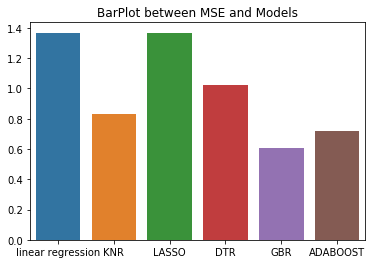

In [44]:
sns.barplot(x=model_list,y=List_rmse)
plt.title("BarPlot between MSE and Models")

In [45]:
maxm_r2=['0.92','0.97','0.92','0.96','0.92','0.98']

Text(0.5,1,'BarPlot between r2 score and Models')

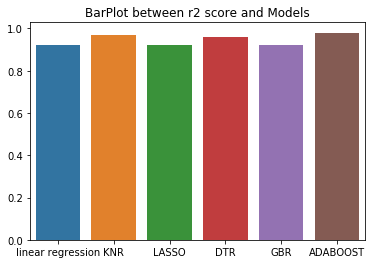

In [46]:
sns.barplot(x=model_list,y=maxm_r2)
plt.title("BarPlot between r2 score and Models")

After performing several regressor models on this data set and after analysing the performance matrix for all the models , it is concluded that 
AdaBoostRegressor is giving the best results which are as follows :

The maximum r2 score  is 0.9825090627846949 at random state 97

mean of cross_val_score 0.97146483260039

std deviation of cross_val_score 0.006414507501487186

RMSE 0.717751117495937

Therefore AdaBoostRegressor is selected as our fnal model 

# Final Model --- AdaBoostRegressor

Training the dataset with adaboostRegressor using all the best hyperparameter which are as follows:-

    1) random_state=97
    
    2)learning_rate=1,
    
    3) n_estimators=100, and 
    
    4) base_estimator=DT

In [47]:
ad=AdaBoostRegressor(learning_rate=1,n_estimators=100,base_estimator=DT)
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=97)
ad.fit(train_x,train_y)
pred = ad.predict(test_x)
r2_scr=r2_score(test_y,pred)

In [48]:
from sklearn.metrics import mean_squared_error
print('RMSE',np.sqrt(mean_squared_error(test_y,pred)))
print('r2_score',r2_score(test_y,pred))
print('mean cross_val_score',cross_val_score(ad,x,y,cv=5,scoring='r2').mean())
print('std deviation of cross_val_score',cross_val_score(ad,x,y,cv=5,scoring='r2').std())

RMSE 0.736659125149934
r2_score 0.980688202247191
mean cross_val_score 0.9733535400313423
std deviation of cross_val_score 0.007102128622748094


# Saving The Model

In [49]:
from sklearn.externals import joblib
joblib.dump(ad,"ad_sales.pkl")

['ad_sales.pkl']

# Conslusion

This data set is actually the data between the number of  sales occupied using different media like TV ,
radio and newspaper. From the dataset it can be seen that it has 200 rows and 4 columns .Since sales has a real valued column and it is a output class 
the first thing that comes into our mind is that it is a regression problem

So as per the work we have performed the null value analysis , EDA and aslo handled the outliers .

In the last section of the work , we have used several regressor models for the prediction and based on the performance matrix 
we have selected AdaBoostRegressor as our Final model.

At last we have saved the final model using joblib.
